In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
data_set = pd.read_csv("dummy variables.csv")
data_set

,town,area,price
0,monroe twonship,2600,550000
1,monroe twonship,3000,565000
2,monroe twonship,3200,610000
3,monroe twonship,3600,680000
4,monroe twonship,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [5]:
dummy_dataset=pd.get_dummies(data_set.town)
dummy_dataset

,monroe twonship,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [12]:
temp_dataset = pd.concat([data_set,dummy_dataset],axis='columns')
temp_dataset

,town,area,price,monroe twonship,robinsville,west windsor
0,monroe twonship,2600,550000,1,0,0
1,monroe twonship,3000,565000,1,0,0
2,monroe twonship,3200,610000,1,0,0
3,monroe twonship,3600,680000,1,0,0
4,monroe twonship,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [17]:
final_dataset = temp_dataset.drop(['town'],axis = 'columns')
final_dataset

,area,price,monroe twonship,robinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,610000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0
5,2600,585000,0,0,1
6,2800,615000,0,0,1
7,3300,650000,0,0,1
8,3600,710000,0,0,1
9,2600,575000,0,1,0


In [18]:

final_dataset =final_dataset.drop(['robinsville'],axis="columns")
final_dataset

,area,price,monroe twonship,west windsor
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,0,0


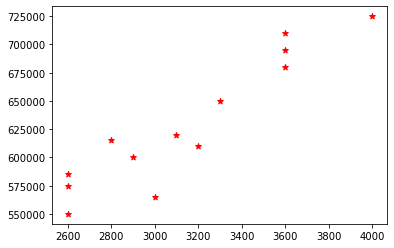

In [20]:
plt.scatter(final_dataset.area,final_dataset.price,marker="*",color="red")

In [21]:
model = linear_model.LinearRegression()
x=final_dataset.drop("price",axis='columns')
x

,area,monroe twonship,west windsor
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,0,0


In [22]:
y=final_dataset.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [23]:
model.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
model.predict([[3400,1,0]])

array([641227.69296925])

In [26]:
model.score(x,y)

0.9573929037221873

In [27]:
model.coef_

array([   126.89744141, -25686.4115244 ,  14327.56396474])